# Company Bankruptcy Dataset
### Link:https://www.kaggle.com/datasets/fedesoriano/company-bankruptcy-prediction?datasetId=1111894
### Author: Abinav Yadamani

# Loading Libraries & Importing Dataset

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
# Setting the warnings to be ignored
warnings.filterwarnings('ignore')

In [2]:
# read csv
data = pd.read_csv("data.csv")
data.head(2)

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.40575,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.51673,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794


# EDA 

In [3]:
print(data.shape)

(6819, 96)


In [4]:
# There are no object type variables in the dataset.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 6819 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2    ROA(A) before interest and % after tax                   6819 non-null   float64
 3    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4    Operating Gross Margin                                   6819 non-null   float64
 5    Realized Sales Gross Margin                              6819 non-null   float64
 6    Operating Profit Rate                                    6819 non-null   float64
 7    Pre-tax net Interest Rate                                6819 non-null   float64
 8    After-tax net Int

All the columns are of numeric type.

In [5]:
pd.set_option('display.max_columns', 100)
pd.set_option('display.width', 500)
a= data.describe()
a= a.iloc[[3,7],:]
print(a.nunique().sort_values().head(2))
data.describe()

 Net Income Flag                      1
 Retained Earnings to Total Assets    2
dtype: int64


,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),Operating Expense Rate,Research and development expense rate,Cash flow rate,Interest-bearing debt interest rate,Tax rate (A),Net Value Per Share (B),Net Value Per Share (A),Net Value Per Share (C),Persistent EPS in the Last Four Seasons,Cash Flow Per Share,Revenue Per Share (Yuan ¥),Operating Profit Per Share (Yuan ¥),Per Share Net profit before tax (Yuan ¥),Realized Sales Gross Profit Growth Rate,Operating Profit Growth Rate,After-tax Net Profit Growth Rate,Regular Net Profit Growth Rate,Continuous Net Profit Growth Rate,Total Asset Growth Rate,Net Value Growth Rate,Total Asset Return Growth Rate Ratio,Cash Reinvestment %,Current Ratio,Quick Ratio,Interest Expense Ratio,Total debt/Total net worth,Debt ratio %,Net worth/Assets,Long-term fund suitability ratio (A),Borrowing dependency,Contingent liabilities/Net worth,Operating profit/Paid-in capital,Net profit before tax/Paid-in capital,Inventory and accounts receivable/Net value,Total Asset Turnover,Accounts Receivable Turnover,Average Collection Days,Inventory Turnover Rate (times),Fixed Assets Turnover Frequency,Net Worth Turnover Rate (times),Revenue per person,Operating profit per person,Allocation rate per person,Working Capital to Total Assets,Quick Assets/Total Assets,Current Assets/Total Assets,Cash/Total Assets,Quick Assets/Current Liability,Cash/Current Liability,Current Liability to Assets,Operating Funds to Liability,Inventory/Working Capital,Inventory/Current Liability,Current Liabilities/Liability,Working Capital/Equity,Current Liabilities/Equity,Long-term Liability to Current Assets,Retained Earnings to Total Assets,Total income/Total expense,Total expense/Assets,Current Asset Turnover Rate,Quick Asset Turnover Rate,Working capitcal Turnover Rate,Cash Turnover Rate,Cash Flow to Sales,Fixed Assets to Assets,Current Liability to Liability,Current Liability to Equity,Equity to Long-term Liability,Cash Flow to Total Assets,Cash Flow to Liability,CFO to Assets,Cash Flow to Equity,Current Liability to Current Assets,Liability-Assets Flag,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
count,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6.819000e+03,6.819000e+03,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6.819000e+03,6.819000e+03,6819.000000,6819.000000,6.819000e+03,6.819000e+03,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6.819000e+03,6.819000e+03,6.819000e+03,6.819000e+03,6819.000000,6.819000e+03,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6.819000e+03,6.819000e+03,6819.000000,6819.000000,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6.819000e+03,6.819000e+03,6819.000000,6.819000e+03,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.0,6819.000000
mean,0.032263,0.505180,0.558625,0.553589,0.607948,0.607929,0.998755,0.797190,0.809084,0.303623,0.781381,1.995347e+09,1.950427e+09,0.467431,1.644801e+07,0.11

Bankrupt? is the target variable with a 0 or 1 outcome. It looks like for most of the features, the interquartile range is very narrow even though the min and max values are 0 and 1. Moreover, all the rows for Net Income Flag column are 1 and can be removed.

In [6]:
data.drop(' Net Income Flag',axis=1,inplace = True)

In [7]:
data.isna().sum().sum()

0

In [8]:
data.duplicated().sum()

0

There are no null or duplicates present in the dataset.

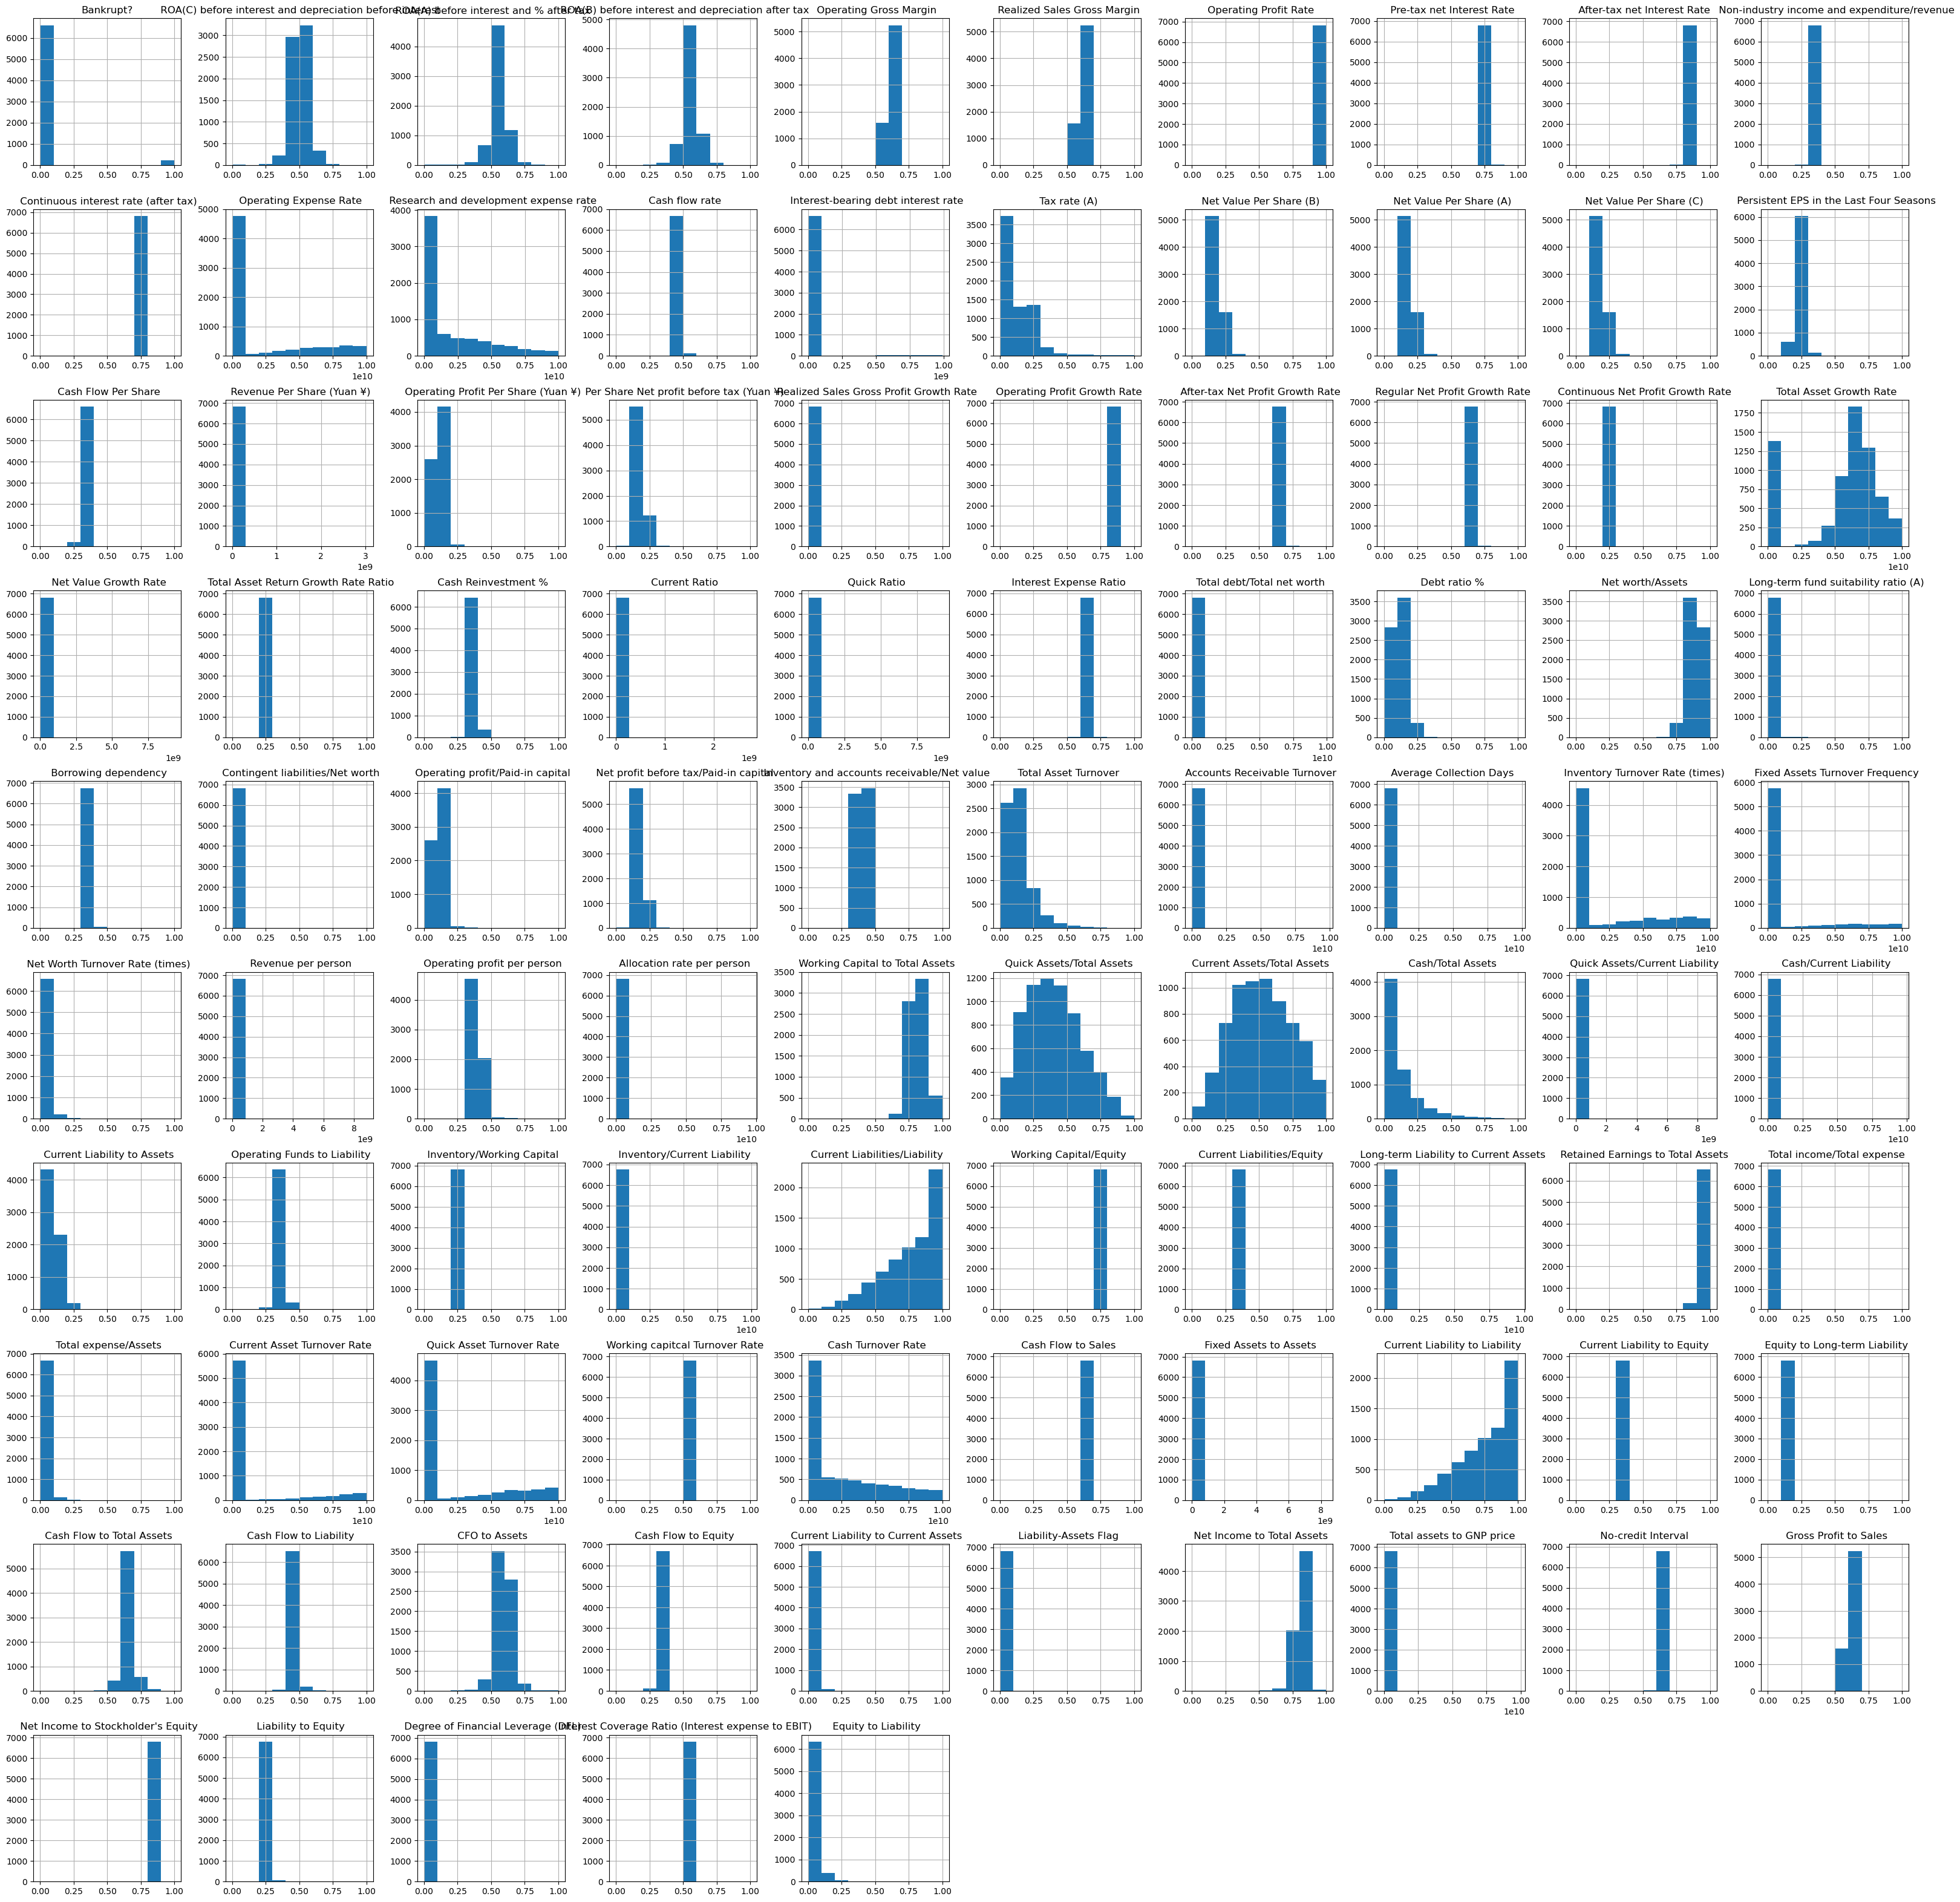

In [9]:
# Frequency plots
data.hist(figsize=(40,40))
plt.show()

In [10]:
# building a correlation matrix (wrt Bankrupt) and removing bankrupt column from the visualization as it will be 1 anyways.
data_corr = data.corr()
data_corr = data_corr.iloc[1:,1]
data_corr.head(5)

 ROA(C) before interest and depreciation before interest    1.000000
 ROA(A) before interest and % after tax                     0.940124
 ROA(B) before interest and depreciation after tax          0.986849
 Operating Gross Margin                                     0.334719
 Realized Sales Gross Margin                                0.332755
Name:  ROA(C) before interest and depreciation before interest, dtype: float64

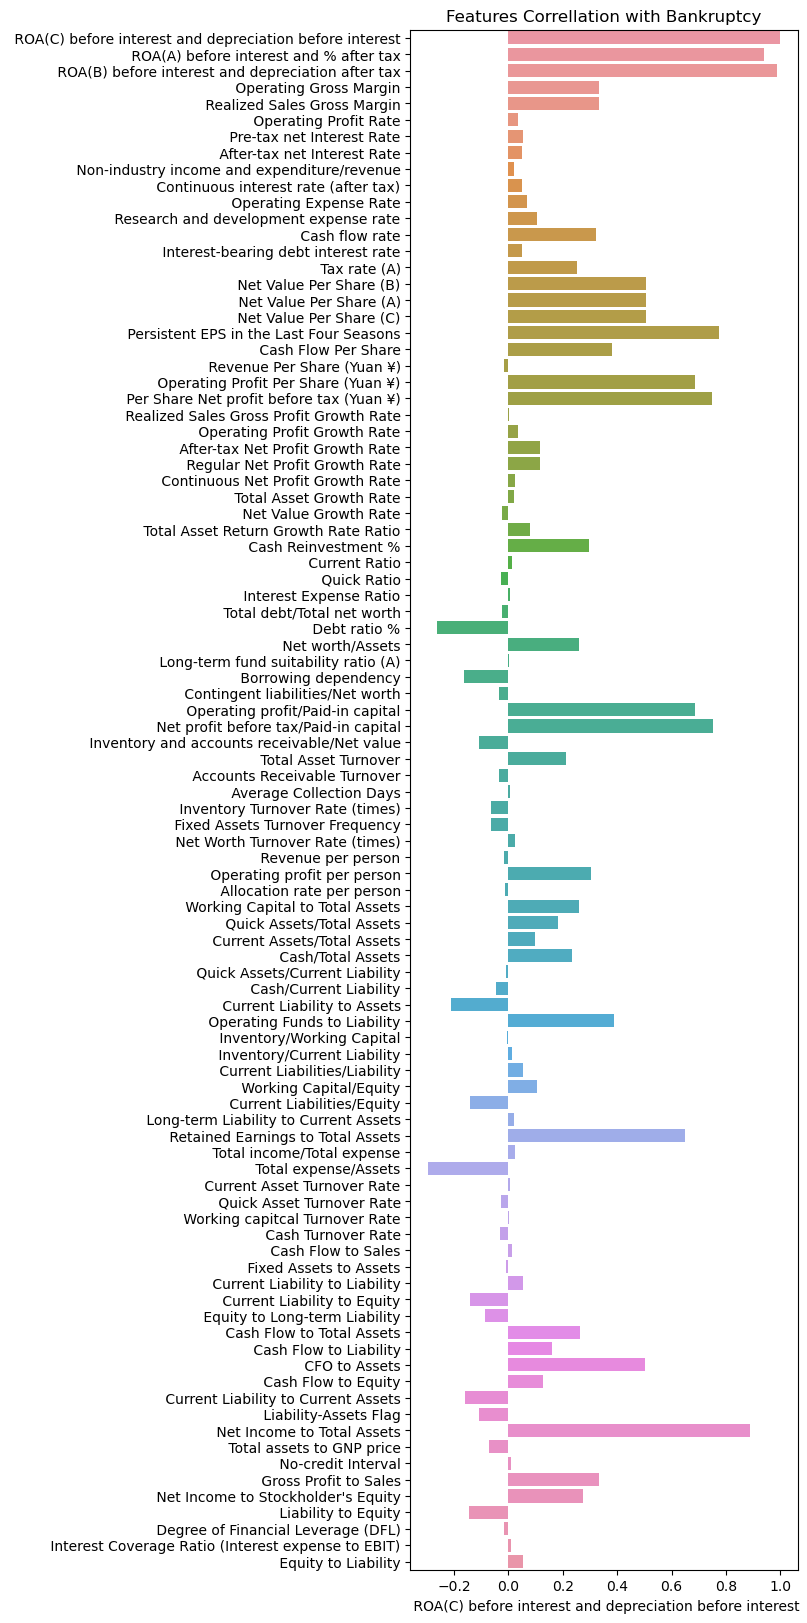

In [11]:
plt.figure(figsize=(5, 20))
sns.barplot(y=data_corr.index,x=data_corr)
plt.title("Features Correllation with Bankruptcy")
plt.show()

In [12]:
# most correalted to Bankruptcy  
c=data.corr()
print('Negatively correlated:\n',c['Bankrupt?'].dropna().sort_values().head(5))
print('\n Positively correlated:\n',c['Bankrupt?'].dropna().sort_values(ascending=False).head(5))

Negatively correlated:
  Net Income to Total Assets                                -0.315457
 ROA(A) before interest and % after tax                    -0.282941
 ROA(B) before interest and depreciation after tax         -0.273051
 ROA(C) before interest and depreciation before interest   -0.260807
 Net worth/Assets                                          -0.250161
Name: Bankrupt?, dtype: float64

 Positively correlated:
 Bankrupt?                               1.000000
 Debt ratio %                           0.250161
 Current Liability to Assets            0.194494
 Borrowing dependency                   0.176543
 Current Liability to Current Assets    0.171306
Name: Bankrupt?, dtype: float64


In [13]:
print(data['Bankrupt?'].value_counts(),'\n\n', data['Bankrupt?'].value_counts()*100/data['Bankrupt?'].count())

0    6599
1     220
Name: Bankrupt?, dtype: int64 

 0    96.77372
1     3.22628
Name: Bankrupt?, dtype: float64


There is huge difference between the obervations of No and Yes classes of the target variable. Hence, stratified samples needs to be drawn. The majority class accuracy is 96.77%. The model accuracies need to beat this benchmark.

# Data Preparation for Model building

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [15]:
y = data['Bankrupt?']
X = data.drop(['Bankrupt?'],axis=1)
print(y.head(5))
X.head(2)

0    1
1    1
2    1
3    1
4    1
Name: Bankrupt?, dtype: int64


,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),Operating Expense Rate,Research and development expense rate,Cash flow rate,Interest-bearing debt interest rate,Tax rate (A),Net Value Per Share (B),Net Value Per Share (A),Net Value Per Share (C),Persistent EPS in the Last Four Seasons,Cash Flow Per Share,Revenue Per Share (Yuan ¥),Operating Profit Per Share (Yuan ¥),Per Share Net profit before tax (Yuan ¥),Realized Sales Gross Profit Growth Rate,Operating Profit Growth Rate,After-tax Net Profit Growth Rate,Regular Net Profit Growth Rate,Continuous Net Profit Growth Rate,Total Asset Growth Rate,Net Value Growth Rate,Total Asset Return Growth Rate Ratio,Cash Reinvestment %,Current Ratio,Quick Ratio,Interest Expense Ratio,Total debt/Total net worth,Debt ratio %,Net worth/Assets,Long-term fund suitability ratio (A),Borrowing dependency,Contingent liabilities/Net worth,Operating profit/Paid-in capital,Net profit before tax/Paid-in capital,Inventory and accounts receivable/Net value,Total Asset Turnover,Accounts Receivable Turnover,Average Collection Days,Inventory Turnover Rate (times),Fixed Assets Turnover Frequency,Net Worth Turnover Rate (times),Revenue per person,Operating profit per person,Allocation rate per person,Working Capital to Total Assets,Quick Assets/Total Assets,Current Assets/Total Assets,Cash/Total Assets,Quick Assets/Current Liability,Cash/Current Liability,Current Liability to Assets,Operating Funds to Liability,Inventory/Working Capital,Inventory/Current Liability,Current Liabilities/Liability,Working Capital/Equity,Current Liabilities/Equity,Long-term Liability to Current Assets,Retained Earnings to Total Assets,Total income/Total expense,Total expense/Assets,Current Asset Turnover Rate,Quick Asset Turnover Rate,Working capitcal Turnover Rate,Cash Turnover Rate,Cash Flow to Sales,Fixed Assets to Assets,Current Liability to Liability,Current Liability to Equity,Equity to Long-term Liability,Cash Flow to Total Assets,Cash Flow to Liability,CFO to Assets,Cash Flow to Equity,Current Liability to Current Assets,Liability-Assets Flag,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Equity to Liability
0,0.370594,0.424389,0.40575,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,0.780985,0.000126,0.0,0.458143,0.000725,0.0,0.147950,0.147950,0.147950,0.169141,0.311664,0.017560,0.095921,0.138736,0.022102,0.848195,0.688979,0.688979,0.217535,4.980000e+09,0.000327,0.263100,0.363725,0.002259,0.001208,0.629951,0.021266,0.207576,0.792424,0.005024,0.390284,0.006479,0.095885,0.137757,0.398036,0.086957,0.001814,0.003487,1.820926e-04,1.165007e-04,0.032903,0.034164,0.392913,0.037135,0.672775,0.166673,0.190643,0.004094,0.001997,0.000147,0.147308,0.334015,0.276920,0.001036,0.676269,0.721275,0.339077,0.025592,0.903225,0.002022,0.064856,7.010000e+08,6.550000e+09,0.593831,4.580000e+08,0.671568,0.424206,0.676269,0.339077,0.126549,0.637555,0.458609,0.520382,0.312905,0.118250,0,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,0.016469
1,0.464291,0.538214,0.51673,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,0.781506,0.000290,0.0,0.461867,0.000647,0.0,0.182251,0.182251,0.182251,0.208944,0.318137,0.021144,0.093722,0.169918,0.022080,0.848088,0.689693,0.689702,0.217620,6.110000e+09,0.000443,0.264516,0.376709,0.006016,0.004039,0.635172,0.012502,0.171176,0.828824,0.005059,0.376760,0.005835,0.093743,0.168962,0.397725,0.064468,0.001286,0.004917,9.360000e+09,7.190000e+08,0.025484,0.006889,0.391590,0.012335,0.751111,0.127236,0.18241

In [16]:
# splitting into train and test straified folds and verifying 
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,stratify=y,random_state=100)
print(X_train.shape)
print(X_test.shape)
print(y_train.value_counts()*100/y_train.count())
print(y_test.value_counts()*100/y_test.count())

(4773, 94)
(2046, 94)
0    96.773518
1     3.226482
Name: Bankrupt?, dtype: float64
0    96.774194
1     3.225806
Name: Bankrupt?, dtype: float64


In [17]:
# There is a need for scaling because of features like Total assets to GNP price.

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


# Training Models 

In [18]:
from sklearn.metrics import classification_report

In [19]:
# DecisionTreeClassifier
#?DecisionTreeClassifier

def_dt = DecisionTreeClassifier(random_state=100)
def_dt.fit(X_train,y_train)
ypred_def_dt = def_dt.predict(X_test)

ypred_dttrain = def_dt.predict(X_train)
print('accuracy of default decision tree for train set:\n\n', classification_report(y_train,ypred_dttrain))
print('\n\n accuracy of default decision tree for test set:\n\n', classification_report(y_test,ypred_def_dt))

accuracy of default decision tree for train set:

               precision    recall  f1-score   support

           0       1.00      1.00      1.00      4619
           1       1.00      1.00      1.00       154

    accuracy                           1.00      4773
   macro avg       1.00      1.00      1.00      4773
weighted avg       1.00      1.00      1.00      4773



 accuracy of default decision tree for test set:

               precision    recall  f1-score   support

           0       0.98      0.98      0.98      1980
           1       0.29      0.30      0.30        66

    accuracy                           0.95      2046
   macro avg       0.64      0.64      0.64      2046
weighted avg       0.95      0.95      0.95      2046



In [20]:
# Logisic Regression
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(C=0.005, n_jobs=-1)
lr.fit(X_train,y_train)
ypred_lr = lr.predict(X_test)

ypred_lrtrain = lr.predict(X_train)
print('accuracy of default Logistic Regression for train set:\n\n', classification_report(y_train,ypred_lrtrain))
print('\n\n accuracy of default Logistic Regression for test set:\n\n', classification_report(y_test,ypred_lr))

accuracy of default Logistic Regression for train set:

               precision    recall  f1-score   support

           0       0.97      1.00      0.98      4619
           1       0.63      0.12      0.21       154

    accuracy                           0.97      4773
   macro avg       0.80      0.56      0.60      4773
weighted avg       0.96      0.97      0.96      4773



 accuracy of default Logistic Regression for test set:

               precision    recall  f1-score   support

           0       0.97      1.00      0.98      1980
           1       0.59      0.15      0.24        66

    accuracy                           0.97      2046
   macro avg       0.78      0.57      0.61      2046
weighted avg       0.96      0.97      0.96      2046



In [21]:
#KNN
from sklearn.neighbors import KNeighborsClassifier
#?KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train,y_train)
ypred_knn = knn.predict(X_test)

ypred_knntrain = lr.predict(X_train)
print('accuracy of default KNN for train set:\n\n', classification_report(y_train,ypred_knntrain))
print('\n\naccuracy of default KNN for test set:\n\n', classification_report(y_test,ypred_knn))

accuracy of default KNN for train set:

               precision    recall  f1-score   support

           0       0.97      1.00      0.98      4619
           1       0.63      0.12      0.21       154

    accuracy                           0.97      4773
   macro avg       0.80      0.56      0.60      4773
weighted avg       0.96      0.97      0.96      4773



accuracy of default KNN for test set:

               precision    recall  f1-score   support

           0       0.97      1.00      0.98      1980
           1       0.75      0.09      0.16        66

    accuracy                           0.97      2046
   macro avg       0.86      0.54      0.57      2046
weighted avg       0.96      0.97      0.96      2046



In [22]:
from sklearn.ensemble import RandomForestClassifier
#?RandomForestClassifier

rf = RandomForestClassifier(random_state=100)
rf.fit(X_train,y_train)
ypred_rf = rf.predict(X_test)

ypred_rftrain = rf.predict(X_train)
print('accuracy of default Random Forest for train set:\n\n', classification_report(y_train,ypred_rftrain))
print('\n\naccuracy of default Random Forest for test set:\n\n', classification_report(y_test,ypred_rf))

accuracy of default Random Forest for train set:

               precision    recall  f1-score   support

           0       1.00      1.00      1.00      4619
           1       1.00      1.00      1.00       154

    accuracy                           1.00      4773
   macro avg       1.00      1.00      1.00      4773
weighted avg       1.00      1.00      1.00      4773



accuracy of default Random Forest for test set:

               precision    recall  f1-score   support

           0       0.97      1.00      0.98      1980
           1       0.50      0.12      0.20        66

    accuracy                           0.97      2046
   macro avg       0.74      0.56      0.59      2046
weighted avg       0.96      0.97      0.96      2046



In [23]:
from sklearn import svm

svm = svm.SVC()
svm.fit(X_train,y_train)
ypred_svm = svm.predict(X_test)

ypred_svmtrain = svm.predict(X_train)
print('accuracy of default Random Forest for train set:\n\n', classification_report(y_train,ypred_svmtrain))
print('\n\naccuracy of default Random Forest for test set:\n\n', classification_report(y_test,ypred_svm))

accuracy of default Random Forest for train set:

               precision    recall  f1-score   support

           0       0.97      1.00      0.99      4619
           1       1.00      0.19      0.33       154

    accuracy                           0.97      4773
   macro avg       0.99      0.60      0.66      4773
weighted avg       0.97      0.97      0.97      4773



accuracy of default Random Forest for test set:

               precision    recall  f1-score   support

           0       0.97      1.00      0.98      1980
           1       0.50      0.02      0.03        66

    accuracy                           0.97      2046
   macro avg       0.73      0.51      0.51      2046
weighted avg       0.95      0.97      0.95      2046



We can observe that all metrics obtained from all the above models are low for the Bankruptcy equals Yes class. 

In [24]:
from sklearn.ensemble import BaggingClassifier

bg = BaggingClassifier(estimator = rf, n_estimators=10, n_jobs=-1,random_state=100)
bg.fit(X_train,y_train)
ypred_bg = bg.predict(X_test)

ypred_bgtrain = bg.predict(X_train)
print('accuracy of Bagging Classifier for train set:', accuracy_score(y_train,ypred_bgtrain))
print('accuracy of Bagging Classifier for test set:', accuracy_score(y_test,ypred_bg))

bg2 = BaggingClassifier(estimator = rf, n_estimators=10, oob_score=True, n_jobs=-1,random_state=100)
bg2.fit(X,y)

print('OOB Score of Bagging Classifier for train set:', bg2.oob_score_)

accuracy of Bagging Classifier for train set: 0.9891053844542217
accuracy of Bagging Classifier for test set: 0.969208211143695
OOB Score of Bagging Classifier for train set: 0.9703768881067605


In [25]:
from xgboost import XGBClassifier
xg = XGBClassifier(n_estimators=10, n_jobs=-1,random_state=100)
xg.fit(X_train,y_train)
ypred_xg = xg.predict(X_test)

ypred_xgtrain = xg.predict(X_train)
print('accuracy of XGB Classifier for train set:\n\n', classification_report(y_train,ypred_xgtrain))
print('\n\naccuracy of XGB Classifier for test set:\n\n', classification_report(y_test,ypred_xg))

accuracy of XGB Classifier for train set:

               precision    recall  f1-score   support

           0       0.99      1.00      1.00      4619
           1       1.00      0.84      0.91       154

    accuracy                           0.99      4773
   macro avg       1.00      0.92      0.95      4773
weighted avg       0.99      0.99      0.99      4773



accuracy of XGB Classifier for test set:

               precision    recall  f1-score   support

           0       0.97      0.99      0.98      1980
           1       0.41      0.18      0.25        66

    accuracy                           0.97      2046
   macro avg       0.69      0.59      0.62      2046
weighted avg       0.96      0.97      0.96      2046



In [26]:
import lightgbm as lgb
lgb = lgb.LGBMClassifier(n_estimators=10, learning_rate=0.1, max_depth=-1, n_jobs=-1,random_state=100)
lgb.fit(X_train,y_train)
ypred_lgb = lgb.predict(X_test)

ypred_lgbtrain = lgb.predict(X_train)
print('accuracy of LGBM Classifier for train set:\n\n', classification_report(y_train,ypred_lgbtrain))
print('\n\naccuracy of LGBM Classifier for test set:\n\n', classification_report(y_test,ypred_lgb))

accuracy of LGBM Classifier for train set:

               precision    recall  f1-score   support

           0       0.99      1.00      0.99      4619
           1       1.00      0.56      0.72       154

    accuracy                           0.99      4773
   macro avg       0.99      0.78      0.85      4773
weighted avg       0.99      0.99      0.98      4773



accuracy of LGBM Classifier for test set:

               precision    recall  f1-score   support

           0       0.97      1.00      0.98      1980
           1       0.67      0.06      0.11        66

    accuracy                           0.97      2046
   macro avg       0.82      0.53      0.55      2046
weighted avg       0.96      0.97      0.96      2046



In [27]:
import catboost as cb
cbm = cb.CatBoostClassifier(n_estimators=10, learning_rate=0.1, max_depth=5, random_state=100,verbose=0)
cbm.fit(X_train,y_train)
ypred_cbm = cbm.predict(X_test)

ypred_cbmtrain = cbm.predict(X_train)
print('accuracy of CatBoost Classifier for train set:\n\n', classification_report(y_train,ypred_cbmtrain))
print('\n\naccuracy of CatBoost Classifier for test set:\n\n', classification_report(y_test,ypred_cbm))

accuracy of CatBoost Classifier for train set:

               precision    recall  f1-score   support

           0       0.97      1.00      0.98      4619
           1       1.00      0.03      0.06       154

    accuracy                           0.97      4773
   macro avg       0.98      0.52      0.52      4773
weighted avg       0.97      0.97      0.95      4773



accuracy of CatBoost Classifier for test set:

               precision    recall  f1-score   support

           0       0.97      1.00      0.98      1980
           1       0.00      0.00      0.00        66

    accuracy                           0.97      2046
   macro avg       0.48      0.50      0.49      2046
weighted avg       0.94      0.97      0.95      2046



# Hyperparameter Tuning 

In [28]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

# It is observed that Random Forest model has provided the best test set accuracy. Let's begin with tuning this model.

#?RandomizedSearchCV
param_grid = {'criterion': ['gini', 'entropy', 'log_loss'],
                       'max_depth' : [3,5,7,9],
                      'n_estimators': [50,100,150]}

GridSearchrf = RandomizedSearchCV(estimator = rf, param_distributions = param_grid, n_jobs=-1, verbose=0, cv=10,scoring = 'accuracy')

GridSearchrf = GridSearchrf.fit(X,y)


In [29]:
print(GridSearchrf.best_score_)
GridSearchrf.best_params_

0.9684705517588847


{'n_estimators': 150, 'max_depth': 7, 'criterion': 'entropy'}

In [30]:
# param_grid_svm = {'kernel': ['linear', 'poly', 'rbf'],
#                        'C' : [1,5,7],
#                       'gamma': [0.1,0.3,0.7]}

# RandomSearchsvm = RandomizedSearchCV(estimator = svm, param_distributions = param_grid_svm, n_jobs=-1, verbose=0, cv=5,scoring = 'accuracy',n_iter =25)

# RandomSearchsvm = RandomSearchsvm.fit(X,y)

In [31]:
# print(RandomSearchsvm.best_score_)
# RandomSearchsvm.best_params_

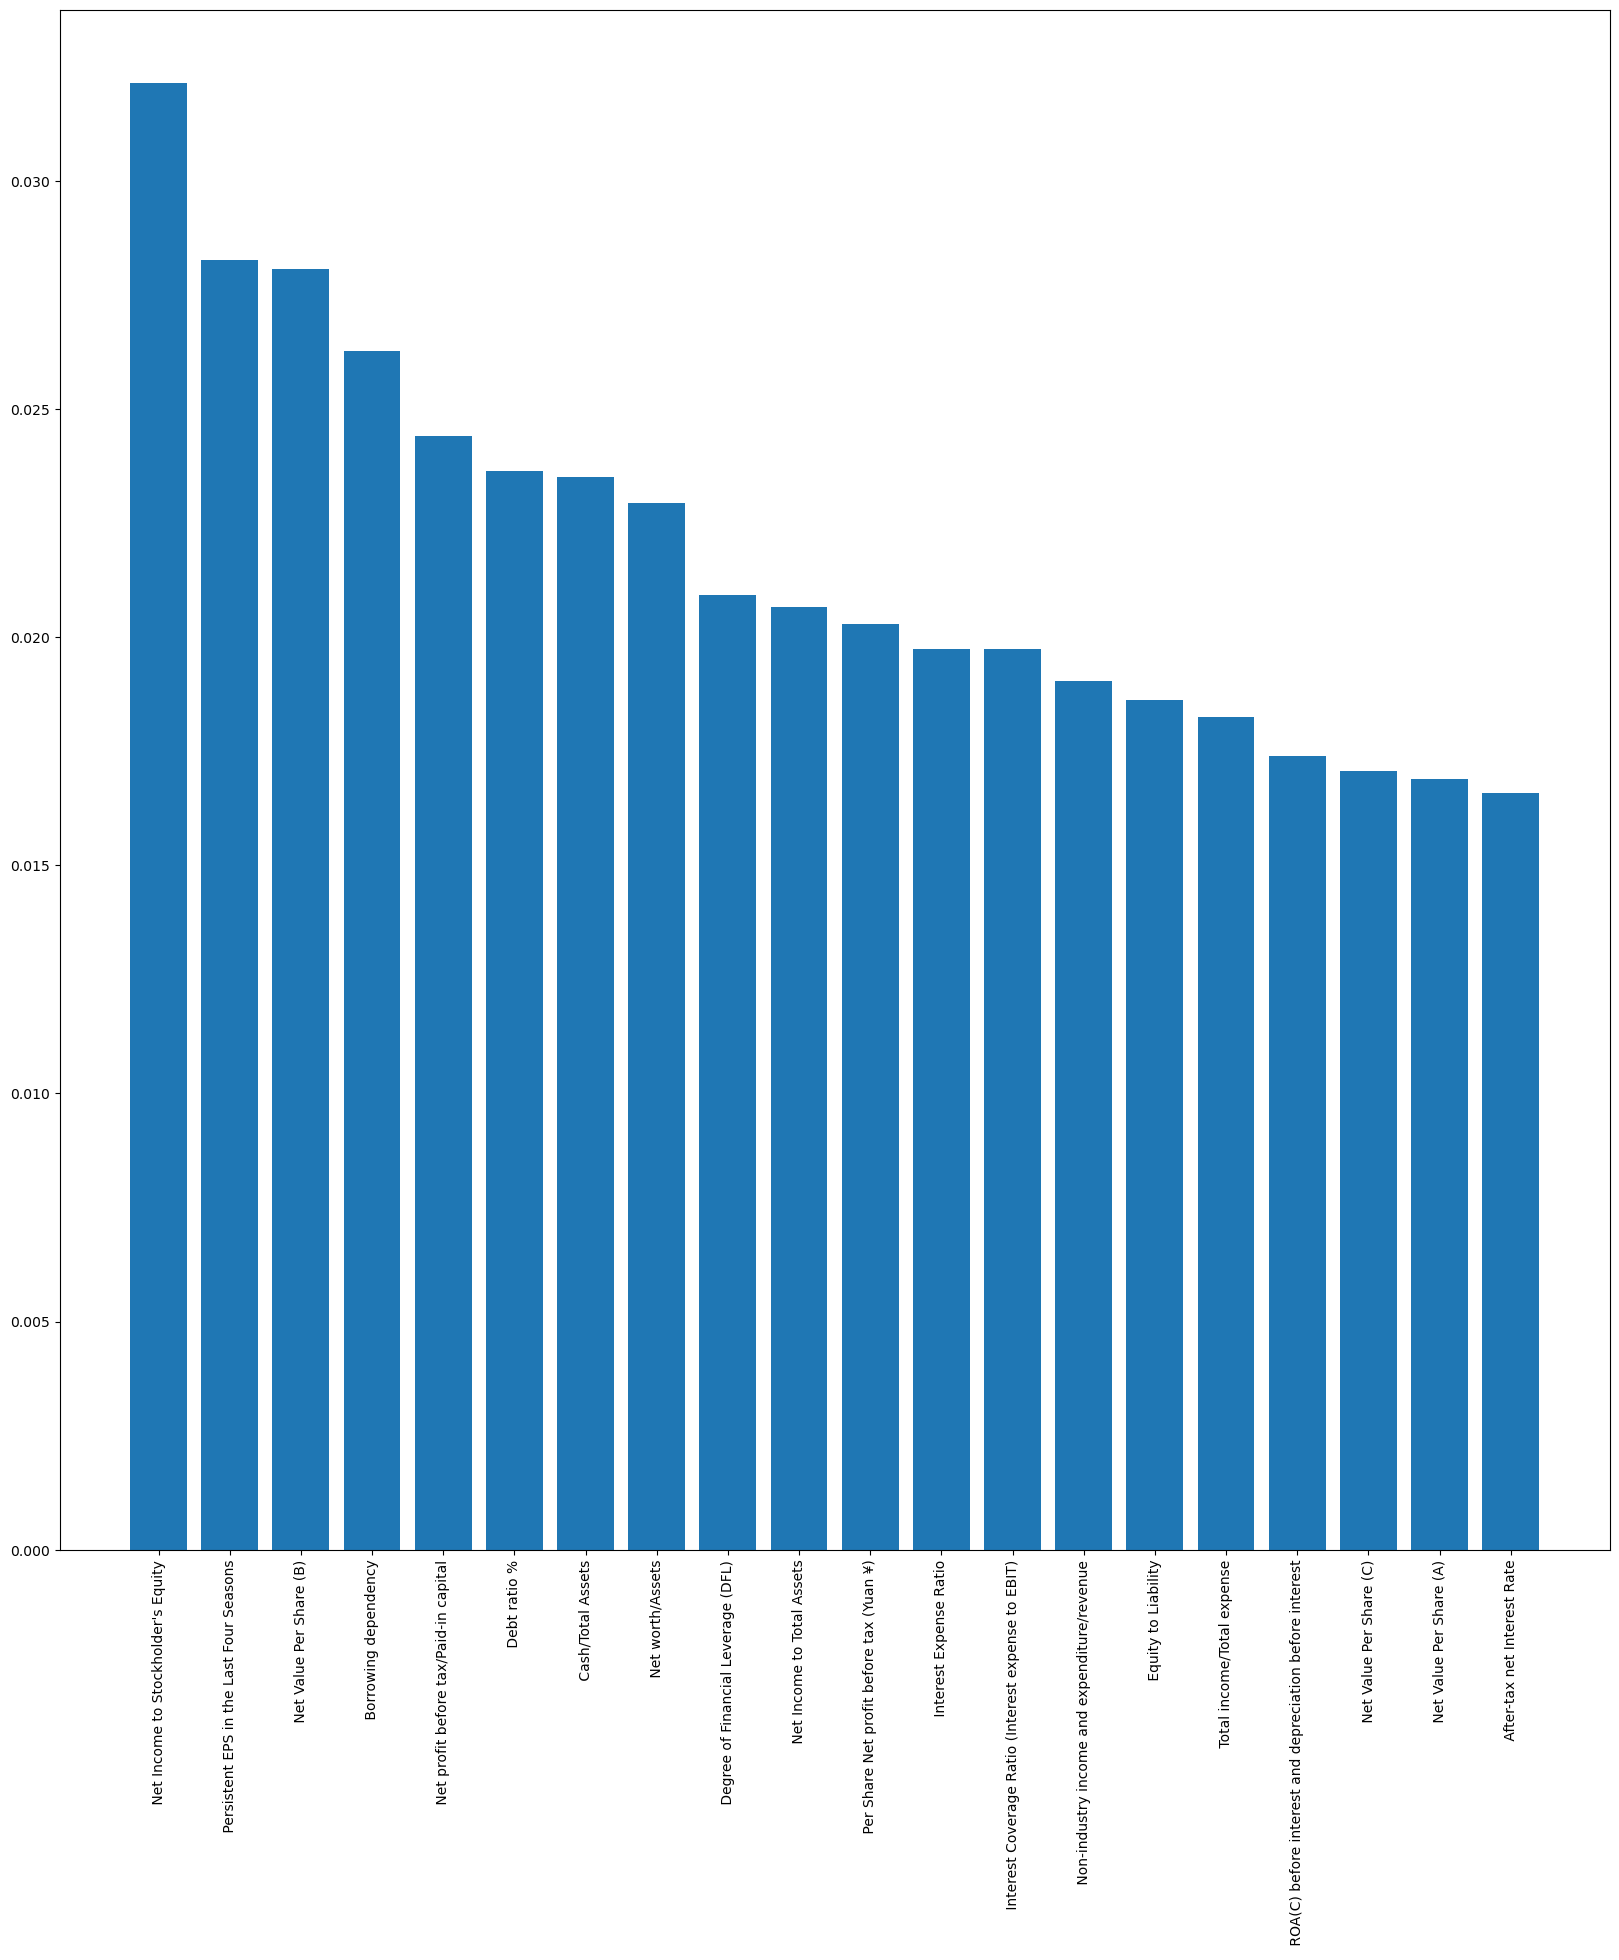

In [32]:
# Top 20 Features from RF
importance = rf.feature_importances_
imp = pd.DataFrame({'feature':X.columns, 'importance':importance})
imp = imp.sort_values(by='importance', ascending = False)
imp=imp.head(20)

plt.figure(figsize=(20,20))
plt.bar(x=imp['feature'], height= imp['importance'])
plt.xticks(rotation = 'vertical')
plt.show()

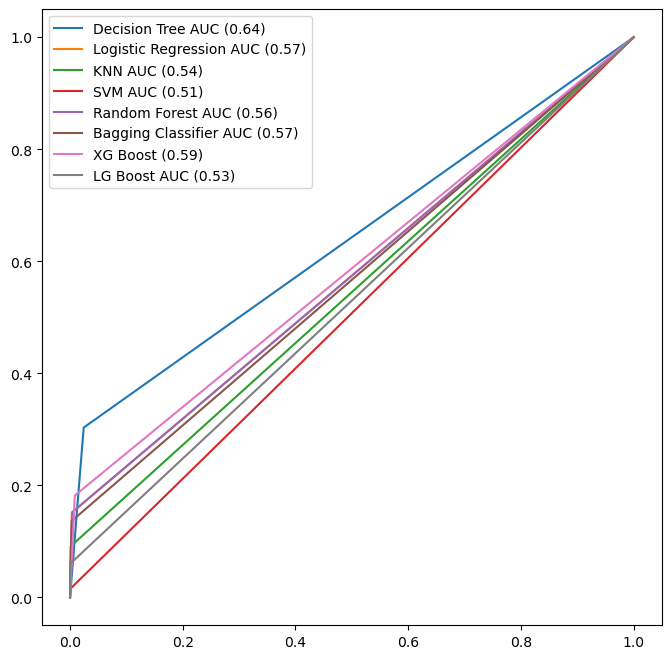

In [33]:
from  sklearn.metrics import roc_auc_score, roc_curve, auc

dt_fpr, dt_tpr, threshold = roc_curve(y_test, ypred_def_dt)
auc_dt = auc(dt_fpr, dt_tpr)

lr_fpr, lr_tpr, threshold = roc_curve(y_test, ypred_lr)
auc_lr = auc(lr_fpr, lr_tpr)

knn_fpr, knn_tpr, threshold = roc_curve(y_test, ypred_knn)
auc_knn = auc(knn_fpr, knn_tpr)

rf_fpr, rf_tpr,  threshold = roc_curve(y_test, ypred_rf)
auc_rf = auc(rf_fpr, rf_tpr)

svm_fpr, svm_tpr, threshold = roc_curve(y_test, ypred_svm)
auc_svm = auc(svm_fpr, svm_tpr)

bg_fpr, bg_tpr, threshold = roc_curve(y_test, ypred_bg)
auc_bg = auc(bg_fpr, bg_tpr)

xg_fpr, xg_tpr,  threshold = roc_curve(y_test, ypred_xg)
auc_xg = auc(xg_fpr, xg_tpr)

lgb_fpr, lgb_tpr, threshold = roc_curve(y_test, ypred_lgb)
auc_lgb = auc(lgb_fpr, lgb_tpr)




plt.figure(figsize = (8,8),dpi=100)
plt.plot(dt_fpr, dt_tpr, label = 'Decision Tree AUC (%0.2f)' %auc_dt)
plt.plot(lr_fpr, lr_tpr, label = 'Logistic Regression AUC (%0.2f)' %auc_lr)
plt.plot(knn_fpr, knn_tpr, label = 'KNN AUC (%0.2f)' %auc_knn)
plt.plot(svm_fpr, svm_tpr, label = 'SVM AUC (%0.2f)' %auc_svm)
plt.plot(lr_fpr, lr_tpr, label = 'Random Forest AUC (%0.2f)' %auc_rf)
plt.plot(bg_fpr, bg_tpr, label = 'Bagging Classifier AUC (%0.2f)' %auc_bg)
plt.plot(xg_fpr, xg_tpr, label = 'XG Boost (%0.2f)' %auc_xg)
plt.plot(lgb_fpr, lgb_tpr, label = 'LG Boost AUC (%0.2f)' %auc_lgb)

plt.legend()
plt.show()


Decision Tree model has the best AUC score

In [34]:
# SMOTE sampling
from sklearn.pipeline import make_pipeline
from imblearn.over_sampling import SMOTE
import numpy as np

In [35]:
sm = SMOTE(sampling_strategy = 0.25, random_state=100, n_jobs=-1)
X_train, y_train = sm.fit_resample(X,y)

print(y_train.value_counts()*100/y_train.count())

0    80.007274
1    19.992726
Name: Bankrupt?, dtype: float64


In [36]:
from xgboost import XGBClassifier
xg = XGBClassifier(n_estimators=10, n_jobs=-1,random_state=100)
xg.fit(X_train,y_train)
ypred_xg = xg.predict(X_test)

ypred_xgtrain = xg.predict(X_train)
print('accuracy of XGB Classifier for train set:\n\n', classification_report(y_train,ypred_xgtrain))
print('\n\naccuracy of XGB Classifier for test set:\n\n', classification_report(y_test,ypred_xg))

accuracy of XGB Classifier for train set:

               precision    recall  f1-score   support

           0       0.99      0.99      0.99      6599
           1       0.97      0.98      0.97      1649

    accuracy                           0.99      8248
   macro avg       0.98      0.99      0.98      8248
weighted avg       0.99      0.99      0.99      8248



accuracy of XGB Classifier for test set:

               precision    recall  f1-score   support

           0       0.97      0.85      0.90      1980
           1       0.06      0.27      0.09        66

    accuracy                           0.83      2046
   macro avg       0.51      0.56      0.50      2046
weighted avg       0.94      0.83      0.88      2046

